# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [6]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



In [7]:
# Descargar HTML

url = "https://companiesmarketcap.com/tesla/revenue/"

response = requests.get(url)

# Transforma el HTML
if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')
# print(response.status_code)

table  = soup.find_all('table', class_ = 'table')
# print(table)

year = table[0].find_all('span', class_ = 'year')
table[0].find_all('td')
# table[0].find_all('img', class_ = "ttm-dates-info-icon info-icon tooltip-title responsive-hidden")


[<td><span class="year">2024</span> (TTM) <img class="ttm-dates-info-icon info-icon tooltip-title responsive-hidden" src="/img/info-icon-grey.svg" tooltip-position="right" tooltip-title="2 Oct 2023 - 30 Sep 2024"/></td>,
 <td>$97.15 B</td>,
 <td class="percentage-green">0.39%</td>,
 <td><span class="year">2023</span> <img class="ttm-dates-info-icon info-icon tooltip-title responsive-hidden" src="/img/info-icon-grey.svg" tooltip-position="right" tooltip-title="1 Jan 2023 - 31 Dec 2023"/></td>,
 <td>$96.77 B</td>,
 <td class="percentage-green">18.8%</td>,
 <td><span class="year">2022</span> <img class="ttm-dates-info-icon info-icon tooltip-title responsive-hidden" src="/img/info-icon-grey.svg" tooltip-position="right" tooltip-title="1 Jan 2022 - 31 Dec 2022"/></td>,
 <td>$81.46 B</td>,
 <td class="percentage-green">51.35%</td>,
 <td><span class="year">2021</span> <img class="ttm-dates-info-icon info-icon tooltip-title responsive-hidden" src="/img/info-icon-grey.svg" tooltip-position="rig

In [8]:
tabla = table[0]

def get_years (tabla):
    return [int(year.get_text()) for year in tabla.find_all('span', class_ = 'year')]

# get_years(tabla)

def get_revenue (tabla):
    return [float(reveneu.get_text().replace('$', "").replace('B', '')) for reveneu in tabla.find_all ('td') if "$" in reveneu.get_text()]

# get_revenue(tabla)

# len(get_revenue(tabla)) == len(years(tabla))

# Procesa el DataFrame

years = get_years(tabla)
revenues = get_revenue(tabla)

data = []

for year, revenue in zip(years, revenues):
    data.append((year, revenue))  # Agregamos los valores individuales a data

df = pd.DataFrame(data, columns=['Years', 'Revenues'])  # Corrección en nombres de columnas
df

,Years,Revenues
0,2024,97.15
1,2023,96.77
2,2022,81.46
3,2021,53.82
4,2020,31.53
5,2019,24.57
6,2018,21.46
7,2017,11.75
8,2016,7.00
9,2015,4.04


In [9]:
# Conectar a la base de datos SQLite
conn = sqlite3.connect('mi_base_de_datos.db')

# Crear un cursor para ejecutar comandos SQL
cursor = conn.cursor()

# Crear la tabla en la base de datos
cursor.execute('''
CREATE TABLE IF NOT EXISTS financial_data (
    Years INTEGER,
    Revenues REAL
)
''')

# Confirmar la creación de la tabla
conn.commit()

# Insertar el dataframe en la tabla SQLite
df.to_sql('financial_data', conn, if_exists='append', index=False)

# Verificar los datos insertados
resultados = cursor.execute('SELECT * FROM financial_data').fetchall()
print(resultados)

# Cerrar la conexión
conn.close()

[(2024, 97.15), (2023, 96.77), (2022, 81.46), (2021, 53.82), (2020, 31.53), (2019, 24.57), (2018, 21.46), (2017, 11.75), (2016, 7.0), (2015, 4.04), (2014, 3.19), (2013, 2.01), (2012, 0.41), (2011, 0.2), (2010, 0.11), (2009, 0.11), (2024, 97.15), (2023, 96.77), (2022, 81.46), (2021, 53.82), (2020, 31.53), (2019, 24.57), (2018, 21.46), (2017, 11.75), (2016, 7.0), (2015, 4.04), (2014, 3.19), (2013, 2.01), (2012, 0.41), (2011, 0.2), (2010, 0.11), (2009, 0.11), (2024, 97.15), (2023, 96.77), (2022, 81.46), (2021, 53.82), (2020, 31.53), (2019, 24.57), (2018, 21.46), (2017, 11.75), (2016, 7.0), (2015, 4.04), (2014, 3.19), (2013, 2.01), (2012, 0.41), (2011, 0.2), (2010, 0.11), (2009, 0.11), (2024, 97.15), (2023, 96.77), (2022, 81.46), (2021, 53.82), (2020, 31.53), (2019, 24.57), (2018, 21.46), (2017, 11.75), (2016, 7.0), (2015, 4.04), (2014, 3.19), (2013, 2.01), (2012, 0.41), (2011, 0.2), (2010, 0.11), (2009, 0.11), (2024, 97.15), (2023, 96.77), (2022, 81.46), (2021, 53.82), (2020, 31.53), (201

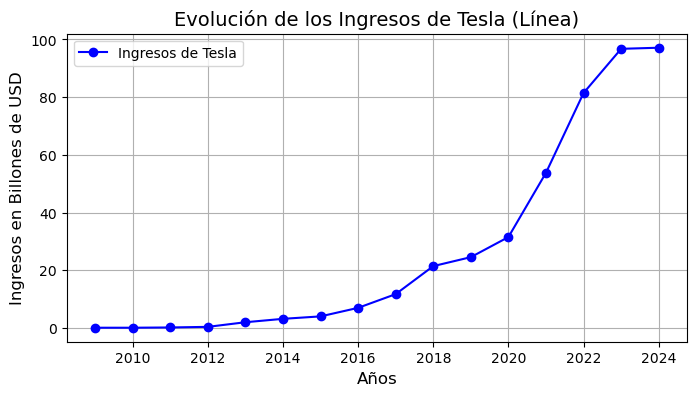

In [11]:
# Visualiza los datos

# Primer gráfico: Línea simple con matplotlib
plt.figure(figsize=(8, 4))
plt.plot(df['Years'], df['Revenues'], marker='o', color='b', label='Ingresos de Tesla')
plt.title('Evolución de los Ingresos de Tesla (Línea)', fontsize=14)
plt.xlabel('Años', fontsize=12)
plt.ylabel('Ingresos en Billones de USD', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

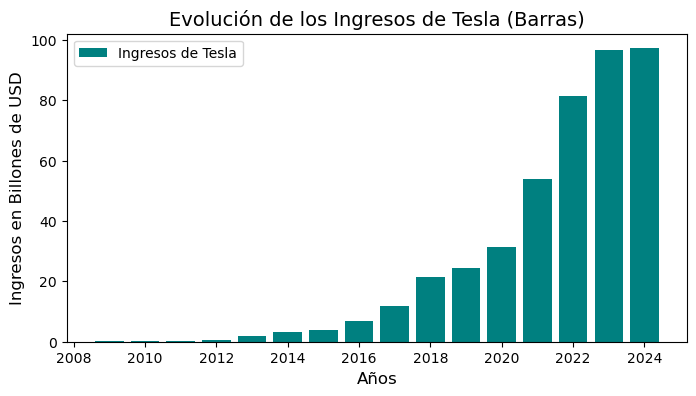

In [13]:
# Segundo gráfico: Gráfico de barras con matplotlib
plt.figure(figsize=(8, 4))
plt.bar(df['Years'], df['Revenues'], color='teal', label='Ingresos de Tesla')
plt.title('Evolución de los Ingresos de Tesla (Barras)', fontsize=14)
plt.xlabel('Años', fontsize=12)
plt.ylabel('Ingresos en Billones de USD', fontsize=12)
plt.legend()
plt.show()

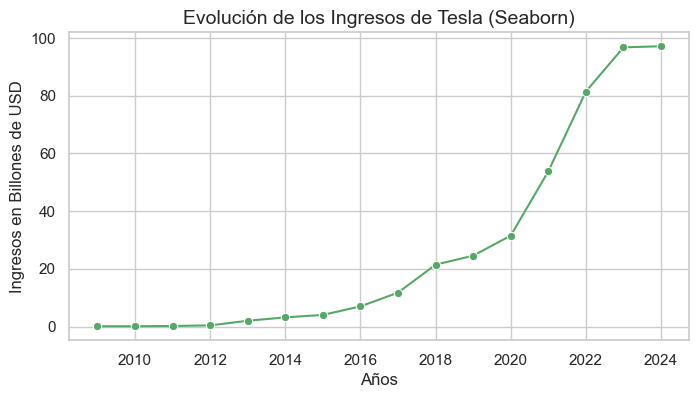

In [15]:
# Tercer gráfico: Gráfico de líneas con seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))
sns.lineplot(x='Years', y='Revenues', data=df, marker='o', color='g')
plt.title('Evolución de los Ingresos de Tesla (Seaborn)', fontsize=14)
plt.xlabel('Años', fontsize=12)
plt.ylabel('Ingresos en Billones de USD', fontsize=12)
plt.show()